In [260]:
import numpy as np
import pandas as pd
import ROOT as r

## Calibration

In [261]:
#read the calibration data

In [262]:
cal = pd.read_csv("../data/clb_35.txt", sep="\t", names=["Angle","Geiger Count"])

In [263]:
cal

,Angle,Geiger Count
0,"3,0","945,0"
1,"3,1","759,0"
2,"3,2","526,0"
3,"3,3","353,0"
4,"3,4","270,0"
...,...,...
416,"44,6","9,0"
417,"44,7","9,0"
418,"44,8","10,0"
419,"44,9","10,0"


In [264]:
def replace_comma(x):
    return x.replace(",",".")

In [265]:
cal["Angle"] = cal["Angle"].apply(replace_comma)
cal["Geiger Count"] = cal["Geiger Count"].apply(replace_comma)

In [266]:
cal["Angle"] = cal["Angle"].astype(float)
cal["Geiger Count"] = cal["Geiger Count"].astype(float)

In [267]:
cal = cal[cal["Angle"]<=25]

In [268]:
cal

,Angle,Geiger Count
0,3.0,945.0
1,3.1,759.0
2,3.2,526.0
3,3.3,353.0
4,3.4,270.0
...,...,...
216,24.6,36.0
217,24.7,36.0
218,24.8,36.0
219,24.9,34.0


In [269]:
cal["error_angle"] = [0.1 for i in range(len(cal["Angle"]))]
cal["error_count"] = [int(np.sqrt(i)/5) for i in cal["Geiger Count"]]
cal["error_count"] = cal["error_count"].astype(float)

/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_62133/2925918234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal["error_angle"] = [0.1 for i in range(len(cal["Angle"]))]
/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_62133/2925918234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cal["error_count"] = [int(np.sqrt(i)/5) for i in cal["Geiger Count"]]
/var/folders/mb/djnxt02s4vqbng178bwhk1280000gn/T/ipykernel_62133/2925918234.py:3: SettingWithCopyWarning: 
A value is trying 

In [270]:
cal

,Angle,Geiger Count,error_angle,error_count
0,3.0,945.0,0.1,6.0
1,3.1,759.0,0.1,5.0
2,3.2,526.0,0.1,4.0
3,3.3,353.0,0.1,3.0
4,3.4,270.0,0.1,3.0
...,...,...,...,...
216,24.6,36.0,0.1,1.0
217,24.7,36.0,0.1,1.0
218,24.8,36.0,0.1,1.0
219,24.9,34.0,0.1,1.0


<Axes: xlabel='Angle', ylabel='Geiger Count'>

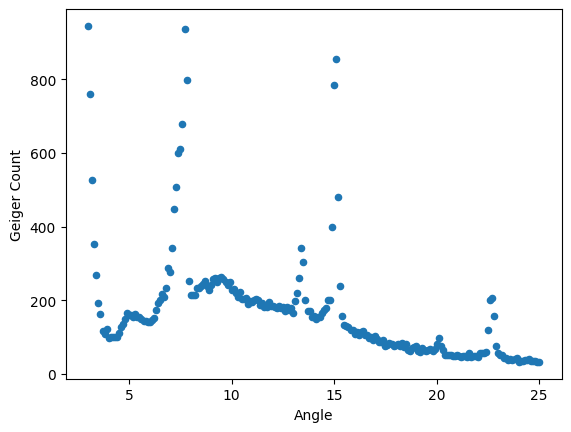

In [271]:
cal.plot(x="Angle", y="Geiger Count", kind="scatter")

In [272]:
#do a scatter plot of the calibration data using root for angle vs count

 FCN=2.77187 FROM MIGRAD    STATUS=CONVERGED      83 CALLS          84 TOTAL
                     EDM=6.20869e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     9.45459e+02   8.27077e+01   7.09284e-02  -7.88578e-06
   2  Mean         7.67181e+00   3.22983e-02   2.33033e-05   2.65938e-02
   3  Sigma        1.79342e-01   4.04328e-02   5.52181e-05  -7.95756e-04
 FCN=0.00132926 FROM MIGRAD    STATUS=CONVERGED      83 CALLS          84 TOTAL
                     EDM=9.64886e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.93752e+02   2.17438e+02   8.58802e-02   2.35658e-06
   2  Mean         1.50618e+01   5.19734e-02   2.44353e-05  -7.58962e-04
   3  Sigma        1.25618e-01

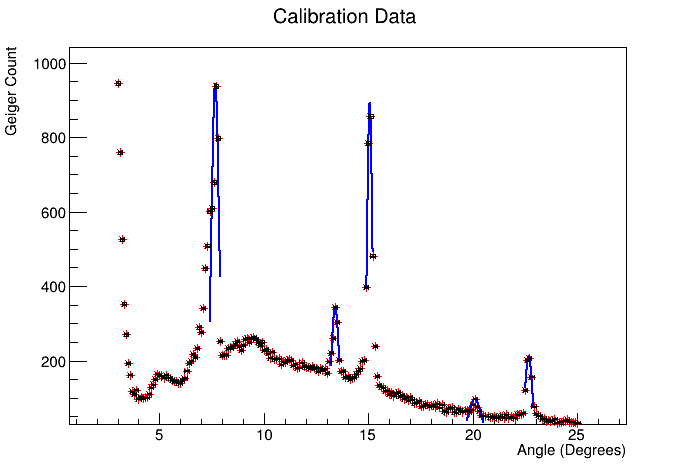

In [273]:
c = r.TCanvas()
gr = r.TGraphErrors(len(cal["Angle"]), cal["Angle"].values, cal["Geiger Count"].values, cal["error_angle"].values, cal["error_count"].values)

gr.SetTitle("Calibration Data")
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
gr.SetMarkerStyle(3)
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a gaussian to the data

k_alpha_1 = r.TF1("k_alpha_1", "gaus", 7.4, 7.9)
k_alpha_1.SetLineColor(r.kBlue)

k_beta_2 = r.TF1("k_beta_2", "gaus", 14.9, 15.2)
k_beta_2.SetLineColor(r.kBlue)

k_alpha_2 = r.TF1("k_alpha_2", "gaus", 13.2, 13.6)
k_alpha_2.SetLineColor(r.kBlue)

k_beta_3 = r.TF1("k_beta_3", "gaus", 19.7, 20.5)
k_beta_3.SetLineColor(r.kBlue)

k_alpha_3 = r.TF1("k_alpha_3", "gaus", 22.5, 22.9)
k_alpha_3.SetLineColor(r.kBlue)

angels = {}

gr.Draw("AP")
gr.Fit(k_alpha_1, "R")
angels.update({"k_alpha_1":k_alpha_1.GetParameter(1)})
gr.Fit(k_beta_2, "R+")
angels.update({"k_beta_2":k_beta_2.GetParameter(1)})
gr.Fit(k_alpha_2, "R+")
angels.update({"k_alpha_2":k_alpha_2.GetParameter(1)})
gr.Fit(k_beta_3, "R+")
angels.update({"k_beta_3":k_beta_3.GetParameter(1)})
gr.Fit(k_alpha_3, "R+")
angels.update({"k_alpha_3":k_alpha_3.GetParameter(1)})

c.Draw()

In [274]:
#molybdenum k-alpha and k-beta wavelengths
mo_ka = 0.07093e-9
mo_kb = 0.06326e-9

In [275]:
#calculate the scattering angles for the k-alpha and k-beta wavelengths

def theta(n, d, wavelength):
    return r.TMath.ASin((n*wavelength)/(2*d))*180/r.TMath.Pi()

In [276]:
#nacl crystal spacing
d = 282e-12

In [277]:
k_alpha_1_theoritical = theta(1, d, mo_ka)
k_beta_2_theoritical = theta(2, d, mo_kb)
k_alpha_2_theoritical = theta(2, d, mo_ka)
k_beta_3_theoritical = theta(3, d, mo_kb)
k_alpha_3_theoritical = theta(3, d, mo_ka)

In [278]:
#add angles both theoritical and experimental values to a dataframe
angels = pd.DataFrame({"k_alpha_1": [k_alpha_1.GetParameter(1), k_alpha_1_theoritical,k_alpha_1.GetParError(1),0.],
                       "k_beta_2": [k_beta_2.GetParameter(1), k_beta_2_theoritical,k_beta_2.GetParError(1),0.],
                       "k_alpha_2": [k_alpha_2.GetParameter(1), k_alpha_2_theoritical,k_alpha_2.GetParError(1),0.],
                       "k_beta_3": [k_beta_3.GetParameter(1), k_beta_3_theoritical,k_beta_3.GetParError(1),0.],
                       "k_alpha_3": [k_alpha_3.GetParameter(1), k_alpha_3_theoritical,k_alpha_3.GetParError(1),0.]},
                      index=["Experimental", "Theoritical", "Experimental Error", "Theoritical Error"])



In [279]:
#experimental error

In [280]:
angels

,k_alpha_1,k_beta_2,k_alpha_2,k_beta_3,k_alpha_3
Experimental,7.671814,15.061761,13.409209,20.086459,22.665514
Theoritical,7.224786,12.963262,14.567762,19.663131,22.165749
Experimental Error,0.032298,0.051973,0.044821,0.019978,0.048590
Theoritical Error,0.000000,0.000000,0.000000,0.000000,0.000000


 FCN=2280.81 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=1.24154e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00567e+00   2.83070e-03   1.94388e-05   4.57316e-02
   2  p1          -4.94576e-01   4.95322e-02   3.40141e-04   3.14574e-03


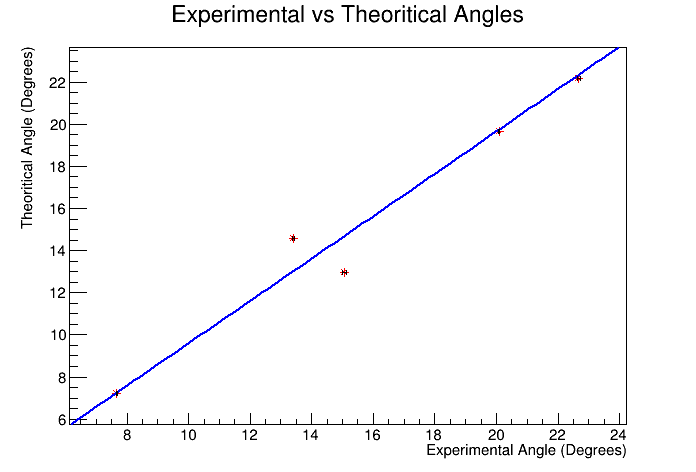

In [281]:
#plot the Experimental vs Theoritical angles using root

c = r.TCanvas()
gr = r.TGraphErrors(len(angels.columns), angels.loc["Experimental"].values/1, angels.loc["Theoritical"].values/1, angels.loc["Experimental Error"].values/1, angels.loc["Theoritical Error"].values/1)

gr.SetTitle("Experimental vs Theoritical Angles")
gr.GetYaxis().SetTitle("Theoritical Angle (Degrees)")
gr.GetXaxis().SetTitle("Experimental Angle (Degrees)")
gr.SetMarkerStyle(3)
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0]*x+[1]", 0, 25)
line.SetParameters(1, 0)
line.SetLineColor(r.kBlue)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

In [282]:
slope = line.GetParameter(0)
slope_error = line.GetParError(0)

## Planck's Constant

In [283]:
#read the data

volt_15 = pd.read_csv("../data/15.txt", sep="\t", names=["Angle","Geiger Count"])
volt_18 = pd.read_csv("../data/18.txt", sep="\t", names=["Angle","Geiger Count"])
volt_21 = pd.read_csv("../data/21.txt", sep="\t", names=["Angle","Geiger Count"])
volt_24 = pd.read_csv("../data/24.txt", sep="\t", names=["Angle","Geiger Count"])
volt_27 = pd.read_csv("../data/27.txt", sep="\t", names=["Angle","Geiger Count"])
volt_30 = pd.read_csv("../data/30.txt", sep="\t", names=["Angle","Geiger Count"])

In [284]:
#apply replace_comma to all the dataframes
volt_15["Angle"] = volt_15["Angle"].apply(replace_comma)
volt_15["Geiger Count"] = volt_15["Geiger Count"].apply(replace_comma)
volt_15["Angle"] = volt_15["Angle"].astype(float)
volt_15["Geiger Count"] = volt_15["Geiger Count"].astype(float)

volt_18["Angle"] = volt_18["Angle"].apply(replace_comma)
volt_18["Geiger Count"] = volt_18["Geiger Count"].apply(replace_comma)
volt_18["Angle"] = volt_18["Angle"].astype(float)
volt_18["Geiger Count"] = volt_18["Geiger Count"].astype(float)

volt_21["Angle"] = volt_21["Angle"].apply(replace_comma)
volt_21["Geiger Count"] = volt_21["Geiger Count"].apply(replace_comma)
volt_21["Angle"] = volt_21["Angle"].astype(float)
volt_21["Geiger Count"] = volt_21["Geiger Count"].astype(float)

volt_24["Angle"] = volt_24["Angle"].apply(replace_comma)
volt_24["Geiger Count"] = volt_24["Geiger Count"].apply(replace_comma)
volt_24["Angle"] = volt_24["Angle"].astype(float)
volt_24["Geiger Count"] = volt_24["Geiger Count"].astype(float)

volt_27["Angle"] = volt_27["Angle"].apply(replace_comma)
volt_27["Geiger Count"] = volt_27["Geiger Count"].apply(replace_comma)
volt_27["Angle"] = volt_27["Angle"].astype(float)
volt_27["Geiger Count"] = volt_27["Geiger Count"].astype(float)

volt_30["Angle"] = volt_30["Angle"].apply(replace_comma)
volt_30["Geiger Count"] = volt_30["Geiger Count"].apply(replace_comma)
volt_30["Angle"] = volt_30["Angle"].astype(float)
volt_30["Geiger Count"] = volt_30["Geiger Count"].astype(float)

In [285]:
#combine all the data into one dataframe and add a column for the voltage

volt_15["Voltage"] = 15
volt_18["Voltage"] = 18
volt_21["Voltage"] = 21
volt_24["Voltage"] = 24
volt_27["Voltage"] = 27
volt_30["Voltage"] = 30

volt = pd.concat([volt_15, volt_18, volt_21, volt_24, volt_27, volt_30])

In [286]:
volt

,Angle,Geiger Count,Voltage
0,3.0,23.0,15
1,3.1,23.0,15
2,3.2,17.0,15
3,3.3,12.0,15
4,3.4,8.0,15
...,...,...,...
73,10.3,156.0,30
74,10.4,148.0,30
75,10.5,142.0,30
76,10.6,150.0,30


### Errors

In [287]:
volt["error_angle"] = [0.1 for i in range(len(volt["Angle"]))]
volt["error_count"] = [(np.sqrt(i)/5) for i in volt["Geiger Count"]]

### Plots and Fits for each voltage

In [288]:
x_intercept={}
x_error = {}

 FCN=2.52767 FROM MIGRAD    STATUS=CONVERGED     105 CALLS         106 TOTAL
                     EDM=2.81086e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.08213e+01   2.80865e+00   4.90759e-05   2.33908e-04
   2  p1          -9.10209e+01   2.45559e+01   4.29054e-04   2.59290e-05


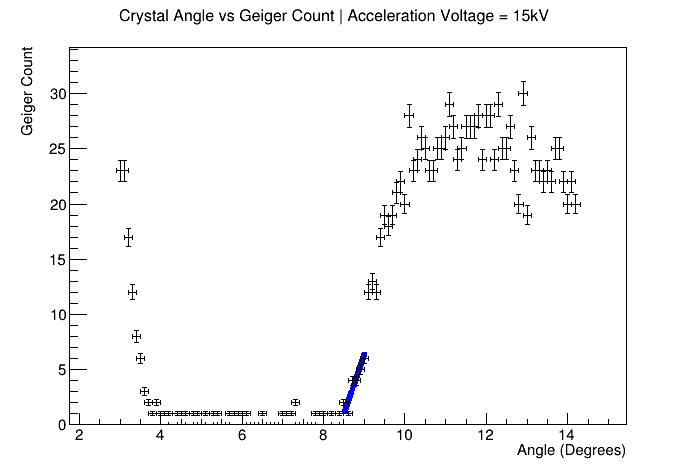

In [289]:
#plot the data using root for 15V
voltage = 15
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 8.5, 9)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage:np.sqrt((line.GetParError(1)/line.GetParameter(0))**2 + (line.GetParError(0)*line.GetParameter(1)/line.GetParameter(0)**2)**2)})

 FCN=4.77891 FROM MIGRAD    STATUS=CONVERGED      86 CALLS          87 TOTAL
                     EDM=1.84863e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.41081e+01   2.44471e+00   1.18115e-04   1.15995e-03
   2  p1          -1.69994e+02   1.83148e+01   8.84808e-04   1.63054e-04


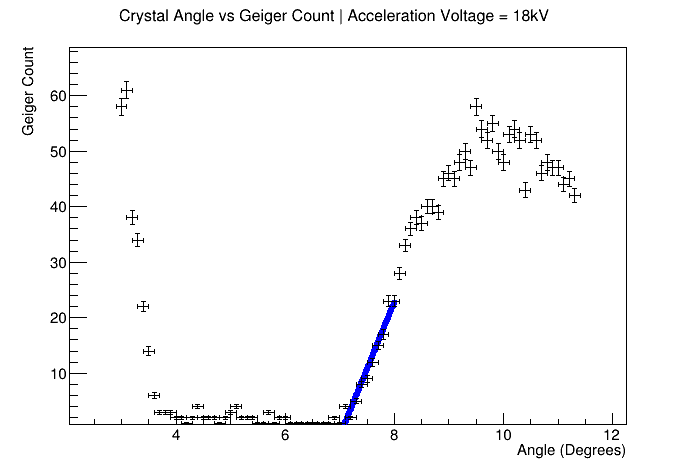

In [290]:
#plot the data using root for 18V
voltage = 18
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 7, 8)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage: np.sqrt((line.GetParError(1) / line.GetParameter(0)) ** 2 + (
            line.GetParError(0) * line.GetParameter(1) / line.GetParameter(0) ** 2) ** 2)})

 FCN=10.9955 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=1.2286e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.98258e+01   1.15293e+00   1.67055e-04  -1.27721e-03
   2  p1          -1.79403e+02   8.05065e+00   1.16616e-03  -1.22696e-04


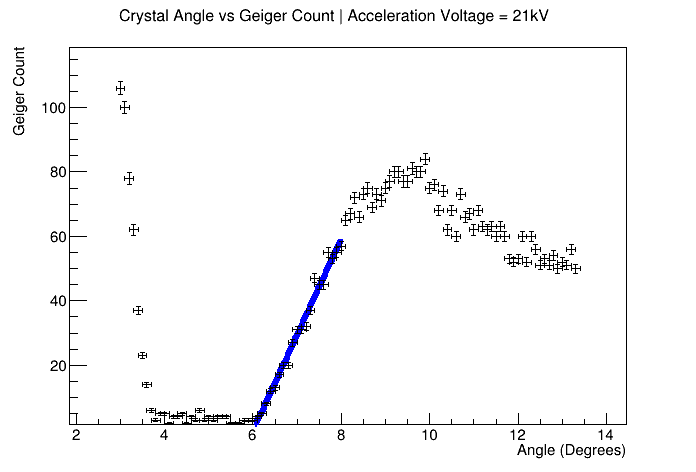

In [291]:
#plot the data using root for 21V
voltage = 21
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 6, 8)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage: np.sqrt((line.GetParError(1) / line.GetParameter(0)) ** 2 + (
            line.GetParError(0) * line.GetParameter(1) / line.GetParameter(0) ** 2) ** 2)})

 FCN=48.1191 FROM MIGRAD    STATUS=CONVERGED      82 CALLS          83 TOTAL
                     EDM=5.17976e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.50838e+01   1.38993e+00   4.56547e-04   7.38777e-05
   2  p1          -1.81461e+02   8.32890e+00   2.73575e-03   1.19668e-05


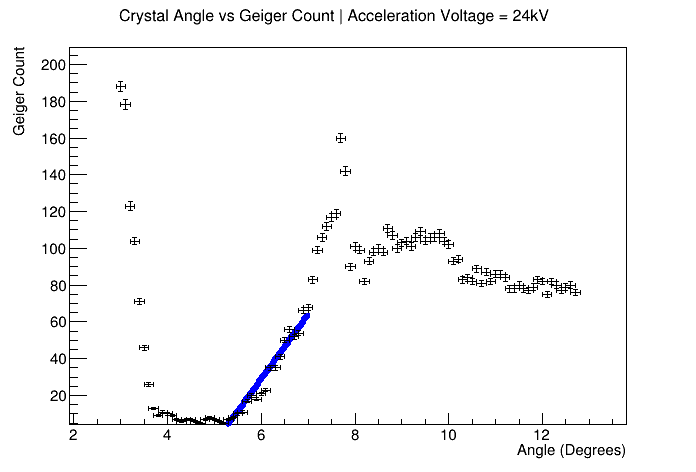

In [292]:
#plot the data using root for 24V
voltage = 24
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 5, 7)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage: np.sqrt((line.GetParError(1) / line.GetParameter(0)) ** 2 + (
            line.GetParError(0) * line.GetParameter(1) / line.GetParameter(0) ** 2) ** 2)})


 FCN=29.1304 FROM MIGRAD    STATUS=CONVERGED      97 CALLS          98 TOTAL
                     EDM=1.55017e-13    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.22905e+01   2.02458e+00   5.31055e-04  -4.08085e-07
   2  p1          -2.53035e+02   1.21556e+01   3.18848e-03  -1.12964e-07


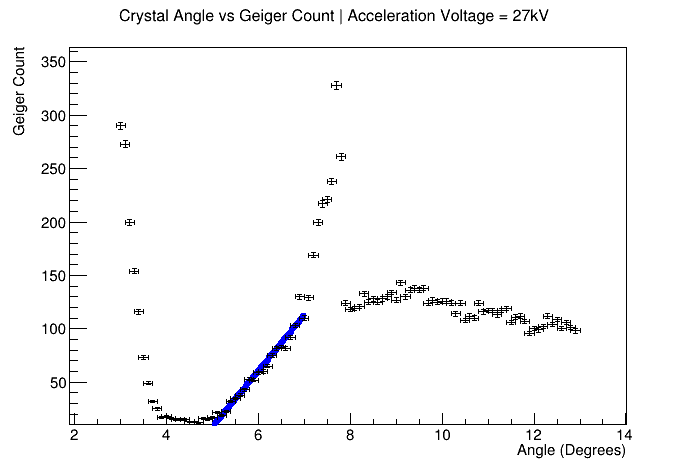

In [293]:
#plot the data using root for 27V
voltage = 27
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 5, 7)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage: np.sqrt((line.GetParError(1) / line.GetParameter(0)) ** 2 + (
            line.GetParError(0) * line.GetParameter(1) / line.GetParameter(0) ** 2) ** 2)})


 FCN=2.03106 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=5.19746e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.63209e+01   8.89040e+00   3.76935e-04  -5.56321e-04
   2  p1          -2.83793e+02   4.53640e+01   1.92255e-03  -8.70854e-05


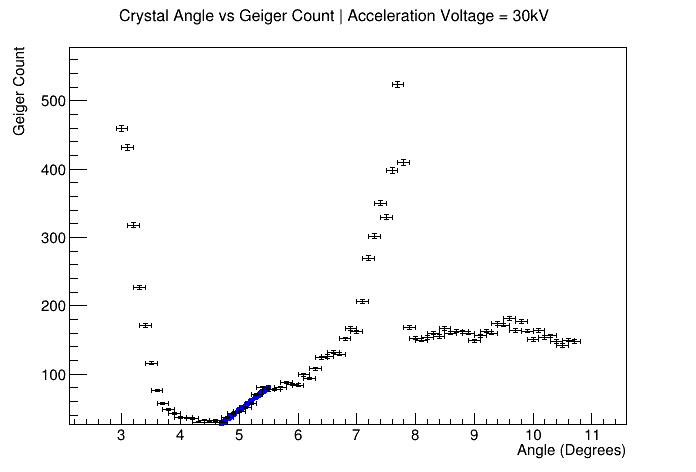

In [294]:
#plot the data using root for 30V
voltage = 30
tmp = volt[volt["Voltage"]==voltage]
c = r.TCanvas()
gr = r.TGraphErrors(len(tmp["Angle"]), tmp["Angle"].values/1, tmp["Geiger Count"].values/1, tmp["error_angle"].values/1, tmp["error_count"].values/1)

gr.SetTitle("Crystal Angle vs Geiger Count | Acceleration Voltage = {}kV".format(voltage))
gr.GetYaxis().SetTitle("Geiger Count")
gr.GetXaxis().SetTitle("Angle (Degrees)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 4.7, 5.5)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

x_intercept.update({voltage:-line.GetParameter(1)/line.GetParameter(0)})
x_error.update({voltage: np.sqrt((line.GetParError(1) / line.GetParameter(0)) ** 2 + (
            line.GetParError(0) * line.GetParameter(1) / line.GetParameter(0) ** 2) ** 2)})


In [295]:
x_intercept

{15: 8.411274871170823,
 18: 7.051301644045831,
 21: 6.015012817684349,
 24: 5.172207745852846,
 27: 4.839028736758486,
 30: 4.279086412414786}

In [296]:
x_error

{15: 3.1488744309454644,
 18: 1.0432757671694057,
 21: 0.356259021250838,
 24: 0.3136029409967041,
 27: 0.2985656570316599,
 30: 0.8926942631223109}

In [297]:
#calibrate x_intercept using slope

for i in x_intercept:
    x_intercept[i] = x_intercept[i] * slope

#propagate errors in x_intercept using slope_error and product rule
for i in x_error:
    x_error[i] = np.sqrt((x_error[i] * slope) ** 2 + (x_intercept[i] * slope_error) ** 2)


In [298]:
x_intercept

{15: 8.458975648183557,
 18: 7.09128994219609,
 21: 6.049124268033987,
 24: 5.201539604831094,
 27: 4.866471120257505,
 30: 4.3033533338866325}

In [299]:
x_error

{15: 3.1668223883259645,
 18: 1.049384244282174,
 21: 0.3586883387549741,
 24: 0.3157249183089174,
 27: 0.30057467559532447,
 30: 0.897839419482331}

In [300]:
x_error

{15: 3.1668223883259645,
 18: 1.049384244282174,
 21: 0.3586883387549741,
 24: 0.3157249183089174,
 27: 0.30057467559532447,
 30: 0.897839419482331}

In [301]:
def angle_to_wavelength(angle):
    return 2 * d * np.sin(angle * np.pi / 180)

In [302]:
wavelength = []
wavelength_error = []
for i in x_intercept:
    wavelength.append(angle_to_wavelength(x_intercept[i]))

for i in x_error:
    wavelength_error.append(angle_to_wavelength(x_error[i]))

In [303]:
wavelength

[8.29650926148361e-11,
 6.9626150705757e-11,
 5.943494499376818e-11,
 5.113186818158959e-11,
 4.78462958516515e-11,
 4.232091801000712e-11]

In [304]:
wavelength_error

[3.115724375658374e-11,
 1.0329201036519868e-11,
 3.530781907138966e-12,
 3.1078720678173615e-12,
 2.9587404326643613e-12,
 8.837661567859007e-12]

In [305]:
c = 299792458
def wavelength_to_frequency(wavelength):
    return c / wavelength

In [306]:
frequency = []
frequency_error = []
for i in wavelength:
    frequency.append(wavelength_to_frequency(i))

for i in wavelength_error:
    frequency_error.append(wavelength_to_frequency(i))



In [307]:
frequency

[3.613477048615867e+18,
 4.3057451110134666e+18,
 5.044043668778251e+18,
 5.863123501283344e+18,
 6.265740172019025e+18,
 7.083789107058398e+18]

In [308]:
frequency_error

[9.621918432263502e+18,
 2.9023779955492725e+19,
 8.490823446043014e+19,
 9.646229042192921e+19,
 1.0132435231232342e+20,
 3.3922147357428974e+19]

In [309]:
energy = []
energy_error = []
e = 1.60217662e-19
voltage = [15e3,18e3, 21e3, 24e3, 27e3, 30e3]

for i in voltage:
    energy.append(i * e)

for i in voltage:
    energy_error.append(0.1 * i * e)

In [310]:
energy

[2.4032649300000002e-15,
 2.883917916e-15,
 3.3645709020000002e-15,
 3.845223888e-15,
 4.325876874e-15,
 4.8065298600000004e-15]

In [311]:
energy_error

[2.40326493e-16,
 2.883917916e-16,
 3.3645709020000003e-16,
 3.845223888e-16,
 4.325876874e-16,
 4.80652986e-16]

In [312]:
#create a dataframe for the data, use float

In [313]:
data = pd.DataFrame({"Voltage": voltage, "Frequency": frequency, "Frequency Error": frequency_error, "Energy": energy, "Energy Error": energy_error})

In [314]:
frequency

[3.613477048615867e+18,
 4.3057451110134666e+18,
 5.044043668778251e+18,
 5.863123501283344e+18,
 6.265740172019025e+18,
 7.083789107058398e+18]

 FCN=4.75267e-06 FROM HESSE     STATUS=OK             10 CALLS          57 TOTAL
                     EDM=1.4822e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.92002e-34   6.50115e-33   2.87787e-38  -2.61485e+27
   2  p1          -9.75964e-17   2.64027e-14   2.08066e-18   8.47361e+06


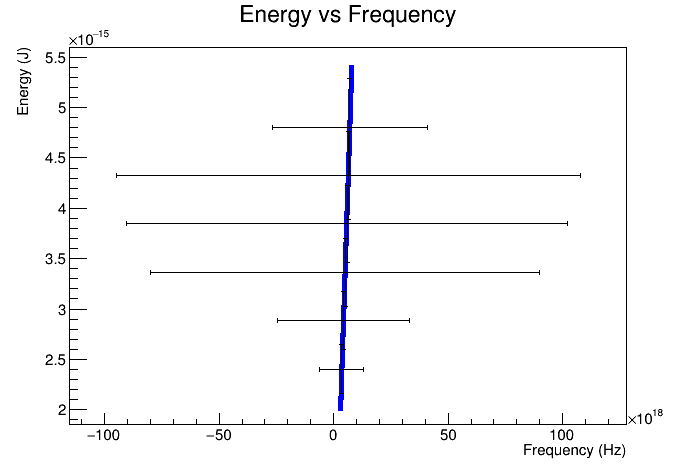

In [315]:
#plot energy vs frequency
c = r.TCanvas()
gr = r.TGraphErrors(len(data["Frequency"]), data["Frequency"].values/1, data["Energy"].values/1, data["Frequency Error"].values/1, data["Energy Error"].values/1)

gr.SetTitle("Energy vs Frequency")
gr.GetYaxis().SetTitle("Energy (J)")
gr.GetXaxis().SetTitle("Frequency (Hz)")
#Set point color
gr.SetMarkerColor(r.kRed)

#fit a line
line = r.TF1("line", "[0] * x + [1]", 3e18,8e18)
line.SetParameters(6.62607004e-34, 0)
line.SetLineColor(r.kBlue)
line.SetLineWidth(5)

gr.Draw("AP")
gr.Fit(line, "R")
c.Draw("same")

## Results

In [316]:
#true value for plancks constant
plancks_constant = 6.62607004e-34

In [317]:
sigma_away = np.abs(line.GetParameter(0)-plancks_constant) / line.GetParError(0)

In [318]:
print(sigma_away, "sigma away from the true value of plancks constant")

0.004521452996341045 sigma away from the true value of plancks constant
